In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import pearsonr,spearmanr

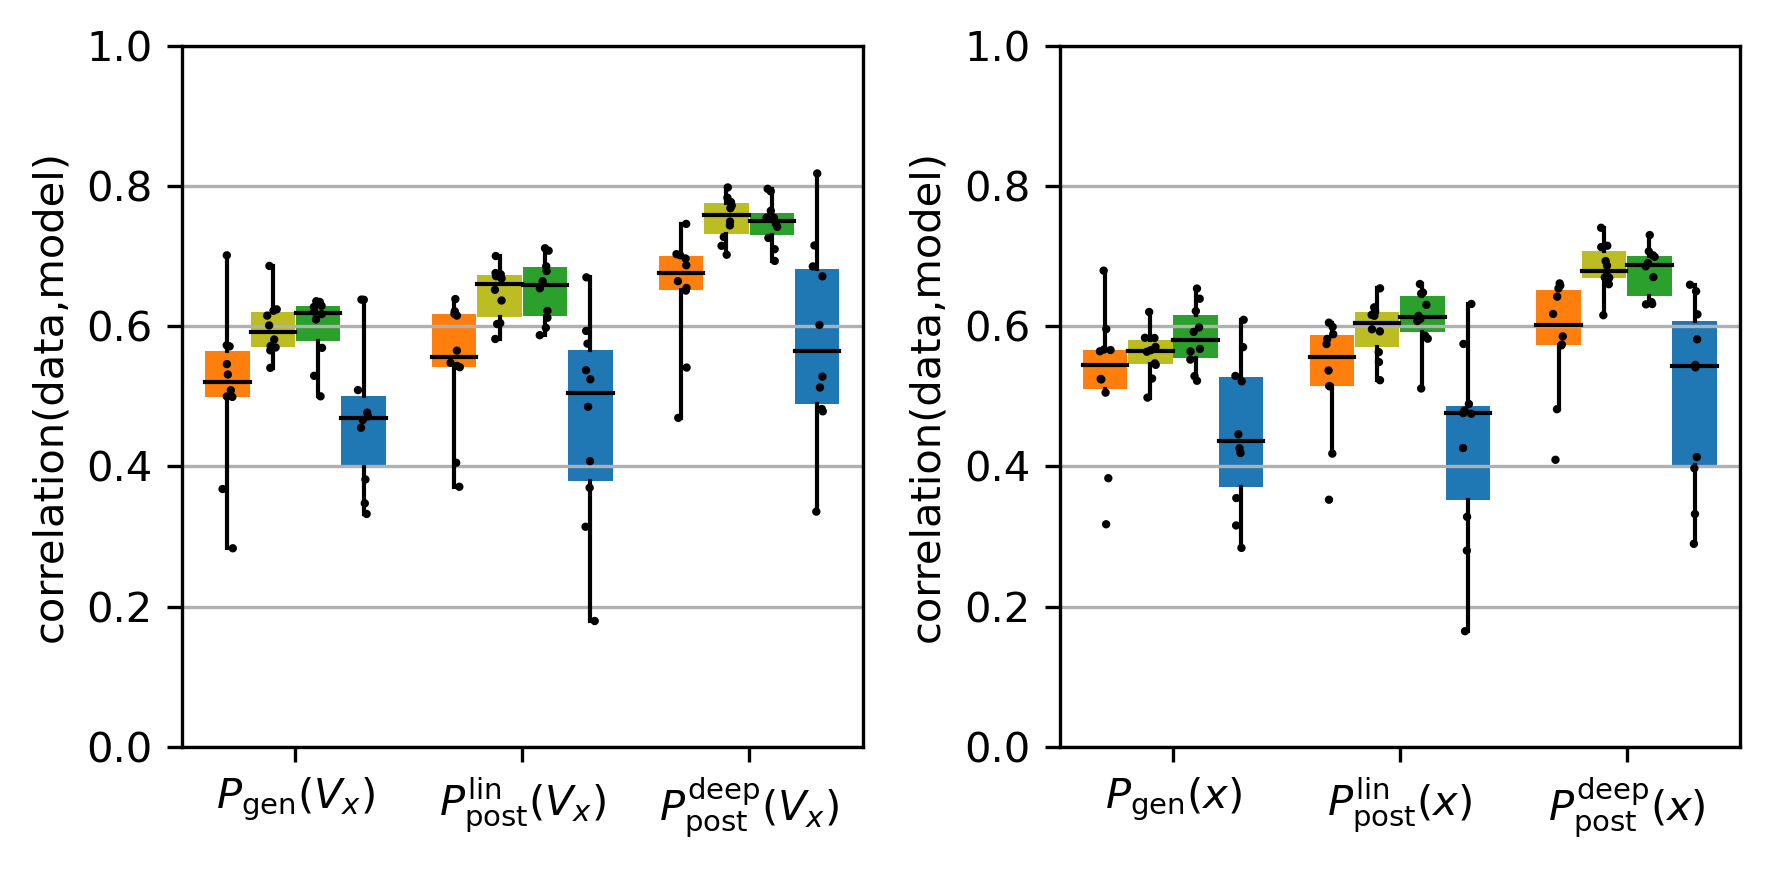

In [3]:
subset_names=['++','CD8+','Tconv','Treg']
dfs=pd.concat([pd.read_csv('results/fig2_'+subset+'.csv') for subset in subset_names])
fig,ax=plt.subplots(figsize=(6,3),dpi=300)
ax=plt.subplot(121)
palette=sns.color_palette()
colors=[palette[i] for i in [1,8,2,0]]
plt.grid()

plt.locator_params(nbins=5)
df_plot1=dfs.loc[dfs.type=='all']
sns.boxplot(y="pearson", x="estimator",hue='cell_type', data=df_plot1,palette=colors,linewidth=1,fliersize=0.1,width=0.8,saturation=1,boxprops={"linewidth": 0},whis=4)
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 1))
sns.stripplot(y="pearson", x="estimator", hue='cell_type',dodge=True,data=df_plot1,size=1,edgecolor='k',linewidth=1.,orient='v')
for i,box in enumerate(ax.artists):
        # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
        ax.lines[j].set_color('black')
        if j%6==2 or j%6==3:ax.lines[j].set_alpha(0)
plt.ylabel(r'correlation(data,model)')
plt.xlabel('')
plt.ylim([0.,1])
ax.legend().set_visible(False)
ax=plt.subplot(122)
plt.locator_params(nbins=5)
df_plot2=dfs.loc[dfs.type=='center']
plt.grid()

sns.boxplot(y="pearson", x="estimator",hue='cell_type', data=df_plot2,palette=colors,linewidth=1,fliersize=0,width=0.8,saturation=1,boxprops={"linewidth": 0},whis=2)
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 1))
sns.stripplot(y="pearson", x="estimator",hue='cell_type',dodge=True,palette=colors,data=df_plot2,size=1,edgecolor='k',linewidth=1.,orient='v')
for i,box in enumerate(ax.artists):
        # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
        ax.lines[j].set_color('black')
        if j%6==2 or j%6==3:ax.lines[j].set_alpha(0)

plt.tight_layout()
plt.ylim([0.,1.])
plt.ylabel('')
plt.xlabel('')
plt.ylabel(r'correlation(data,model)')
plt.tight_layout()
handles, labels = ax.get_legend_handles_labels()
labels_=['DP', 'CD8+', 'Tconv', 'Treg']
l = plt.legend(handles[4:], labels_, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False,handletextpad=0.1)
ax.legend().set_visible(False)
plt.show()